## 실습 1: 회귀 분석 (Linear Regression)

목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.   
데이터셋: California Housing dataset  
내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [14]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 데이터 import
from sklearn.datasets import fetch_california_housing

In [412]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

len(X_train): 15718
len(X_test): 3930
Train셋의 25.003181066293422% Test
-------------------------------------------
[2.46261781 2.35265039 2.38280854 ... 1.09415659 1.22249851 2.51182952]
-------------------------------------------
Mean Square Error: 0.5649550993958931
R^2 Score: 0.4107241031039385
-------------------------------------------


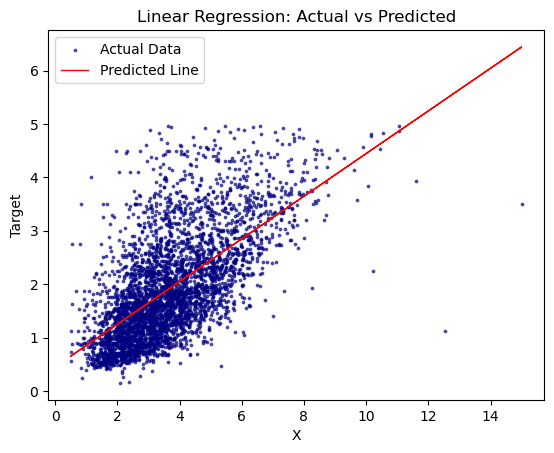

'\n선형 회귀 기법을 썼을 때 R squared 값도 너무 낮게 나옴\n다른 모델을 적용해야 하는 데이터라고 판별됨\n'

In [402]:
'''
<보너스>
- 이상치라고 판단할 수 있는 y=5 값을 제거
'''
Xc = []
yc = []
for i in range(len(y)):
    if(y[i]<5) :
        Xc.append(X[i])
        yc.append(y[i])


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(Xc,yc,test_size=0.2,random_state=42)
print(f"len(X_train): {len(X_train)}\nlen(X_test): {len(X_test)}")
print(f"Train셋의 {len(X_test)/len(X_train)*100}% Test")
print("-------------------------------------------")

# 2차원 배열로 바꾸기
X_train = np.array(X_train).reshape(len(X_train),1)
X_test = np.array(X_test).reshape(len(X_test),1)

# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)   # fit()의 "X_train" 파라미터 자리에는 2차원 배열이 들어가야 함

# 예측
y_pred = lin_reg.predict(X_test)
print(y_pred)
print("-------------------------------------------")

# 평가
mse = mean_squared_error(y_test, y_pred)   # 평균제곱오차
r2 = r2_score(y_test, y_pred)   # 결정계수
print(f"Mean Square Error: {mse}")
print(f"R^2 Score: {r2}")

print("-------------------------------------------")
# 시각화
plt.figure()
plt.scatter(X_test, y_test, color='navy', s=3, alpha=0.6, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth = 1, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Target')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()
'''
선형 회귀 기법을 썼을 때 R squared 값도 너무 낮게 나옴
다른 모델을 적용해야 하는 데이터라고 판별됨
'''

In [420]:
# 데이터 로드
cali = fetch_california_housing()

# 데이터를 특성과 타겟으로 분할
X = cali.data
y = cali.target
print(f"X: {X}")
print(f"y: {y}")
print("-"*70)

# linear regression 에 사용될 X변수 하나만 선택
feature_index = 0
X = X[:, feature_index]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"len(X_train): {len(X_train)}\nlen(X_test): {len(X_test)}")
print(f"Train셋의 {len(X_test)/len(X_train)*100}% Test")

X: [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
y: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
----------------------------------------------------------------------
len(X_train): 16512
len(X_test): 4128
Train셋의 25.0% Test


### Linear Regression

In [422]:
# 2차원 배열로 바꾸기
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)

In [424]:
X_train   # 2차원 배열로 바뀜

array([[3.2596],
       [3.8125],
       [4.1563],
       ...,
       [2.9344],
       [5.7192],
       [2.5755]])

In [426]:
# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)   # fit()의 "X_train" 파라미터 자리에는 2차원 배열이 들어가야 함

# 예측
y_pred = lin_reg.predict(X_test)
print(y_pred)

[1.14958917 1.50606882 1.90393718 ... 4.31500772 1.612455   1.93412956]


In [428]:
# 평가
mse = mean_squared_error(y_test, y_pred)   # 평균제곱오차
r2 = r2_score(y_test, y_pred)   # 결정계수
print(f"Mean Square Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Square Error: 0.7091157771765548
R^2 Score: 0.45885918903846656


In [430]:
print(len(X_test))
print(len(y_pred))

4128
4128


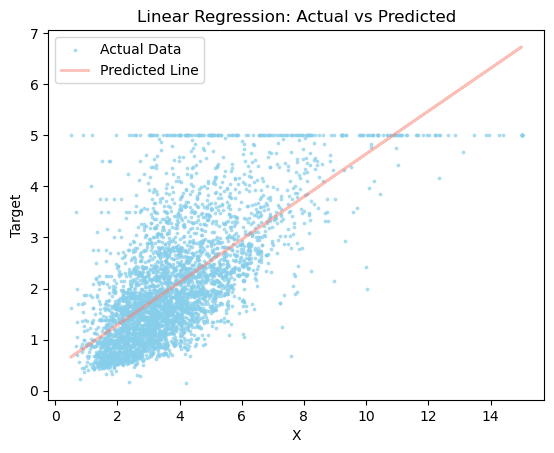

'\n선형 회귀 기법을 썼을 때 R squared 값도 너무 낮게 나옴\nR² 값이 낮으면, 선형 회귀 모델이 데이터의 분산을 잘 설명하지 못한다는 의미입니다. \n이는 모델이 적합하지 않거나, 데이터가 선형 관계가 아닌 비선형 관계를 가지고 있을 수 있다는 것을 시사합니다. \n다른 모델을 적용해야 하는 데이터라고 판별됨\n'

In [432]:
# 시각화
plt.figure()
plt.scatter(X_test, y_test, color='skyblue', s=3, alpha=0.6, label='Actual Data')
plt.plot(X_test, y_pred, color='salmon', linewidth=2, alpha=0.5, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Target')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()
'''
선형 회귀 기법을 썼을 때 R squared 값도 너무 낮게 나옴
R² 값이 낮으면, 선형 회귀 모델이 데이터의 분산을 잘 설명하지 못한다는 의미입니다. 
이는 모델이 적합하지 않거나, 데이터가 선형 관계가 아닌 비선형 관계를 가지고 있을 수 있다는 것을 시사합니다. 
다른 모델을 적용해야 하는 데이터라고 판별됨
'''

### Random Forest Regression

In [435]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성 및 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 평가
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 0.941250114855158
Random Forest R^2 Score: 0.28171270917366775


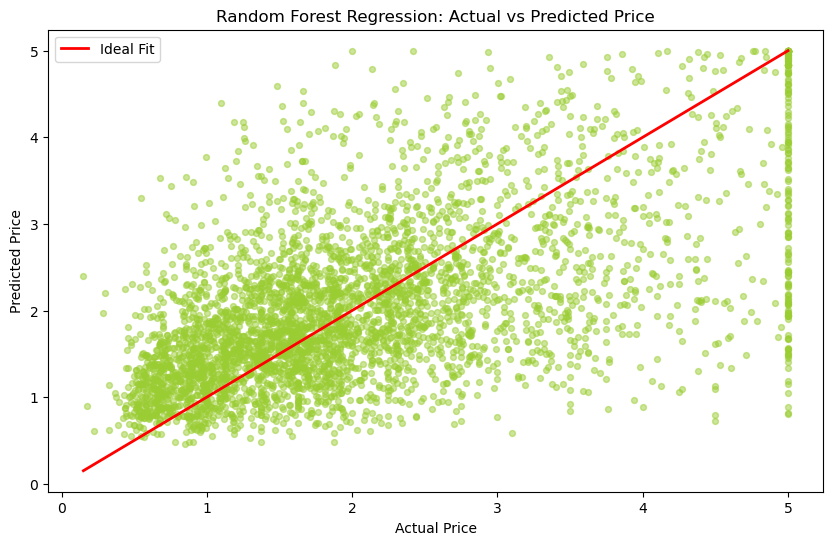

"\n<요약>\n- 빨간 선: 실제값과 예측값이 완전히 일치하는 이상적인 경우를 나타냄\n- 산점도: 실제 값과 예측 값을 비교하여 모델의 예측 성능을 시각적으로 평가할 수 있음\n- 범례: 점선의 의미를 명확히 하기 위해 'Ideal Fit'이라는 레이블을 추가하여, 이 선이 이상적인 예측을 나타냄을 표시\n"

In [443]:
# 시각화 - 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=18, color='yellowgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-r', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

'''
<요약>
- 빨간 선: 실제값과 예측값이 완전히 일치하는 이상적인 경우를 나타냄
- 산점도: 실제 값과 예측 값을 비교하여 모델의 예측 성능을 시각적으로 평가할 수 있음
- 범례: 점선의 의미를 명확히 하기 위해 'Ideal Fit'이라는 레이블을 추가하여, 이 선이 이상적인 예측을 나타냄을 표시
'''

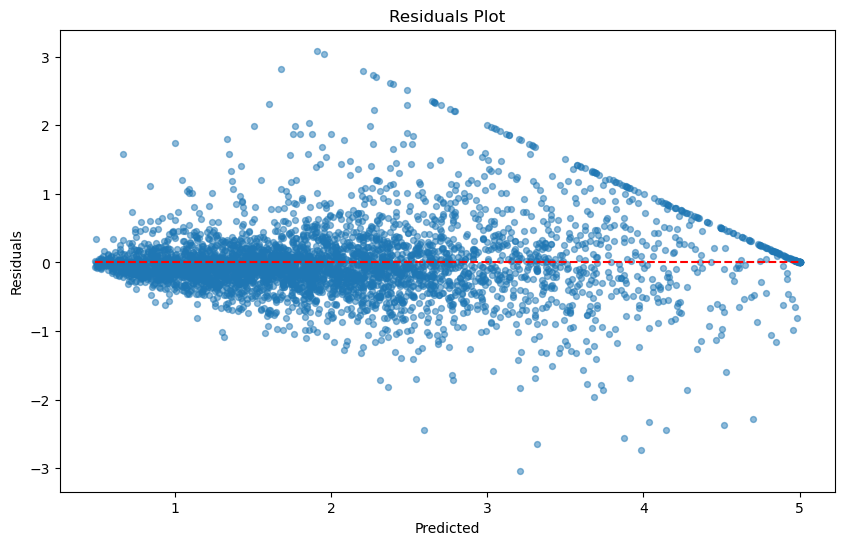

In [252]:
# 잔차 계산 및 시각화
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, s=18)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## XGBoost 

In [41]:
!pip3 install cmake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 MB 5.6 MB/s eta 0:00:0000:0100:01


In [43]:
!pip3 install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.1 MB/s eta 0:00:00a 0:00:01


In [45]:
import xgboost as xgb

# 데이터 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 모델 생성 및 학습
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42
}
num_rounds = 100
xg_reg = xgb.train(params, dtrain, num_rounds)

# 예측
y_pred_xgb = xg_reg.predict(dtest)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")

XGBoost Mean Squared Error: 0.2225899267544737
XGBoost R^2 Score: 0.8301370561019205


In [ ]:
# 시각화
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='salmon', linewidth=3, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()